In [1]:
import numpy as np

In [5]:
lines = [line.rstrip('\n') for line in open('german.data-numeric.txt')]

In [43]:
print(lines[18])
row = lines[18].split()
print(row)
ins = np.array(row)
data = ins.astype(np.int)
print(data)

   2  24   2 126   1   5   2   2   4  44   3   1   1   2   1   0   1   1   0   0   0   0   0   0   2 
['2', '24', '2', '126', '1', '5', '2', '2', '4', '44', '3', '1', '1', '2', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '2']
[  2  24   2 126   1   5   2   2   4  44   3   1   1   2   1   0   1   1
   0   0   0   0   0   0   2]


In [45]:
data = []
n_good = 0
n_bad = 0
for i in range(len(lines)-1):
    row = lines[i].split()
    if row[-1] == 1:
        n_good += 1
    else:
        n_bad += 1
    data.append(np.array(row).astype(np.int))
data = np.asarray(data)
print(data.shape)
print("Good: ", n_good)
print("Bad: ", n_bad)

(999, 25)
('Good: ', 0)
('Bad: ', 999)


In [46]:
print(data[0,:])
print(data[1,:])

[ 1  6  4 12  5  5  3  4  1 67  3  2  1  2  1  0  0  1  0  0  1  0  0  1
  1]
[ 2 48  2 60  1  3  2  2  1 22  3  1  1  1  1  0  0  1  0  0  1  0  0  1
  2]


In [47]:
from sklearn.model_selection import train_test_split

feature = data[:,:-1]
label = data[:,-1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 24)
(799, 1)
(200, 24)
(200, 1)


In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test).reshape(-1, 1)
print(y_pred.shape)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

(200, 1)
Number of mislabeled points out of a total 200 points : 54
The error rate is: 0.270000 


array([[105,  31],
       [ 23,  41]])

In [51]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 200 points : 59
The error rate is: 0.295000 


array([[108,  28],
       [ 31,  33]])

In [52]:
from sklearn import svm

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
# clf = svm.LinearSVC()
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 200 points : 61
The error rate is: 0.305000 


array([[131,   5],
       [ 56,   8]])

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 200 points : 44
The error rate is: 0.220000 


/Users/Deep_Learning/anaconda3/envs/dl_basic/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[120,  16],
       [ 28,  36]])

In [54]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test).reshape(-1, 1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 200 points : 54
The error rate is: 0.270000 


array([[108,  28],
       [ 26,  38]])

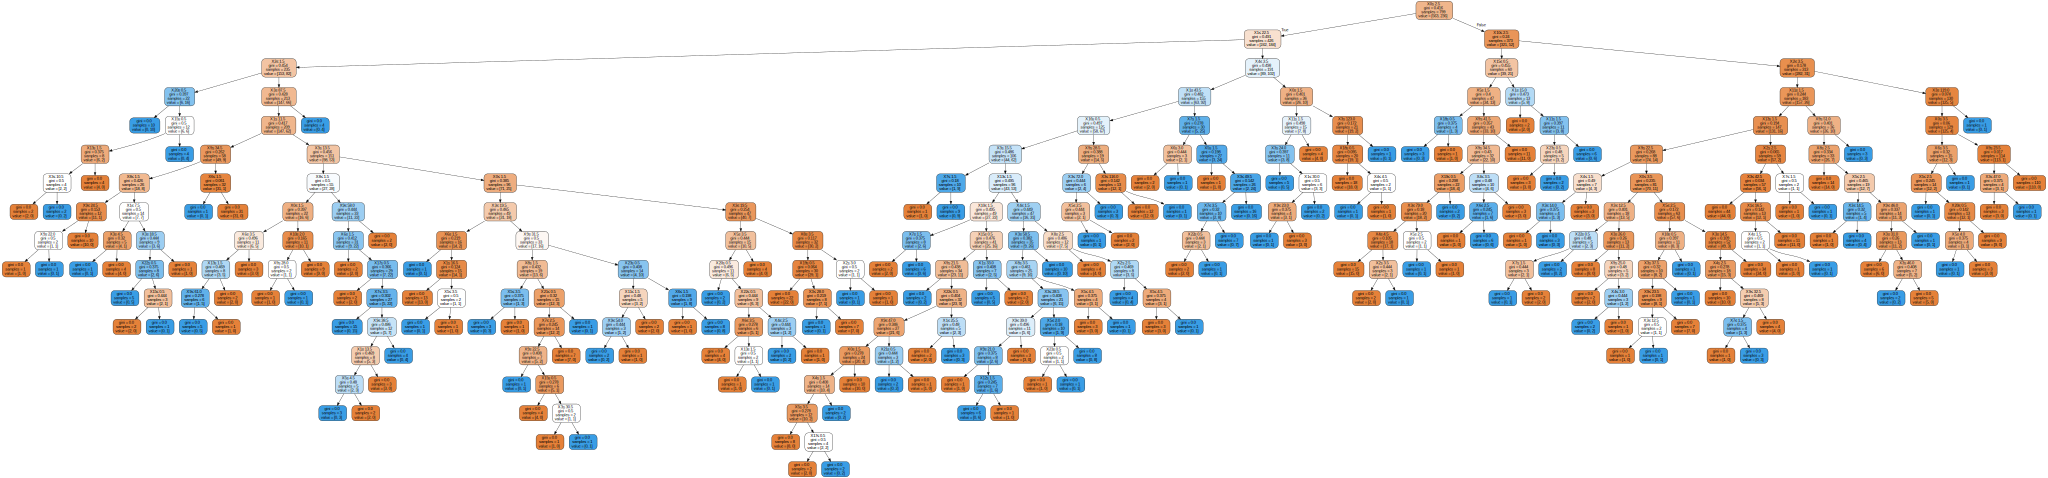

In [57]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT_German") 
graph

In [58]:
print(X_train.shape)
print(y_train.shape)
train = np.hstack((X_train,y_train))
print(train.shape)
test = np.hstack((X_test, y_test))
print(test.shape)
list_X_test = X_test.tolist()
for ins in list_X_test:
    ins.append(None)

(799, 24)
(799, 1)
(799, 25)
(200, 25)


In [59]:
model = BayesianNetwork.from_samples(train, algorithm='exact') # << Default BNSL setting
tic = time.time()
list_y_pred = model.predict(list_X_test)
t = time.time() - tic
print "Time (s): ", t

y_pred = []
for ins in list_y_pred:
    y_pred.append(ins[-1])
y_pred = np.array(y_pred).reshape(-1, 1)
print(y_pred.shape)


print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

print("The error rate is: %f " 
      % (float((y_test != y_pred).sum())/X_test.shape[0]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


# p = model.log_probability(data).sum()

# print "Chow-Liu"

# print "P(D|M): ", p
# print model.structure

# %memit BayesianNetwork.from_samples(X, algorithm='chow-liu')


NameError: name 'BayesianNetwork' is not defined